In [91]:
import irt_parameter_estimation as ipe
import numpy as np
import matplotlib.pyplot as plt

In [92]:
diff=[-1,1,2]
disc=[1,1,1]
guess=[0,0,0]
ability=[-1,0,1]

In [105]:
def plot_ICC(ability, diff, disc, guess):
    ability_range = np.arange(-3, 3, 0.01)
    i=0.01
    for a,b,c,ability in zip(diff, disc, guess,ability):
        prob_correct = ipe.logistic3PLabc(a=a, b=b, c=c, theta=ability_range)
        
        intersection_idx = np.argwhere(np.diff(np.sign(ability_range - ability))).flatten()
        
        label = "{} parts test".format(int(i))
        plt.plot(ability_range, prob_correct, label=label)
        i=i+1
        
        plt.vlines(ability, ymin=0, ymax=1, colors='green', linestyles='--')
        plt.hlines(prob_correct[intersection_idx], xmin=ability-1.5, xmax=ability+1.5, colors='green', linestyles='--')
        plt.plot(ability_range[intersection_idx], prob_correct[intersection_idx], 'ro')

        anotation = "prob: {:.1f}".format(prob_correct[intersection_idx][0])
        plt.annotate(anotation, (ability_range[intersection_idx]-0.5, prob_correct[intersection_idx]), textcoords="offset points",xytext=(0,10),ha="center")
        
        plt.legend()
        plt.xlabel("user ability")
        plt.ylabel("probability of correctly answering")

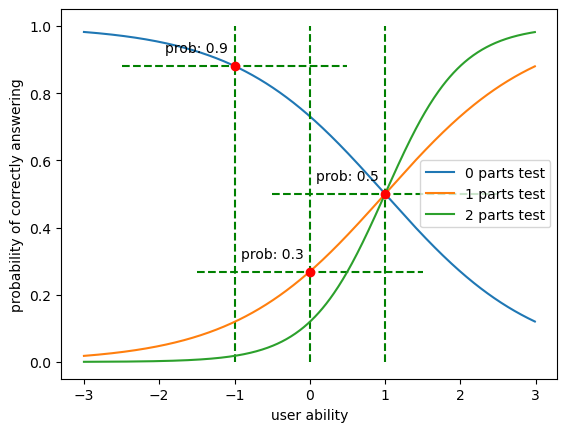

In [106]:
plot_ICC(ability=ability, diff=diff, disc=disc, guess=guess)